## Machine Learning

Типы обучения в ИИ:
- SUPERVISED LEARNING (с учителем) - у нас есть размеченный датасет для обучения алгоритма МО.
- UNSUPERVISED LEARNING (без учителя) - у нас есть только датасет и алгоритм ищет взаимосвязи в представленнох данных.
- REINFORCEMENT LEARNING (с подкреплением) - нету датасета и агоритм взаимодействует с окружением, чтобы учиться.

#### Linear Regression. Линейная Регрессия.
Это подход для моделирование взаимосвязи между скалярной зависимой переменной y и одной или несколькими независимыми переменными x (с учителем).

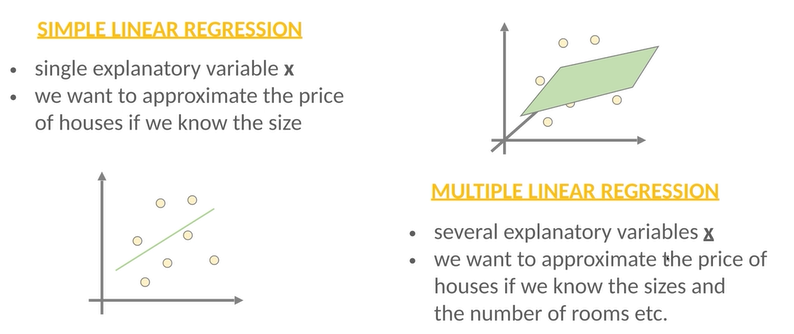
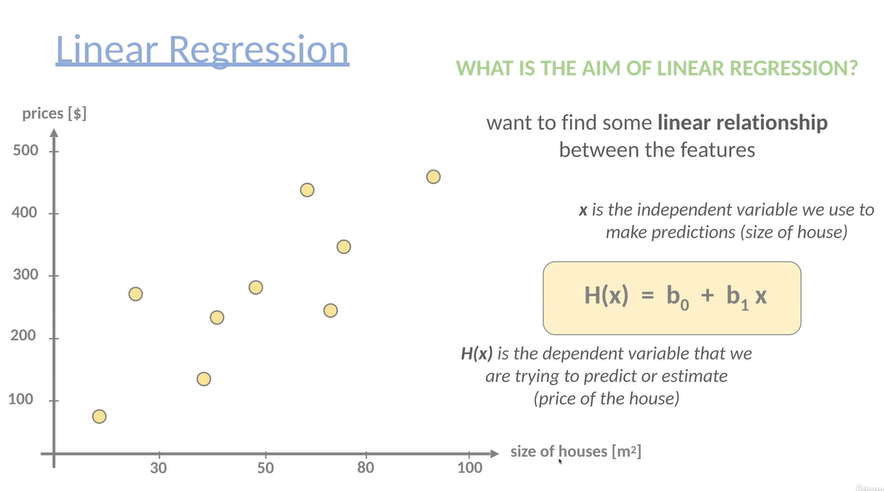

Мы обучаем модель, значит находим зависимость между H(x) и x переменных. После обучения находим значение b, чтобы делать предсказания.

#### Optimization algorithms.

MSE (Mean Squared Error) - разница между y-labels, предоставленных в датасете, и H(x), предсказанных моделью (cost-function. функция затрат: [H(x) - y]^2). 

Optimization methods:
- design matrix approach - линейная алгебра, мы можем преобразовать проблему в линейное уравнение и использовать стандартный метод (используя матричные операции, b = (X'X)^(-1)X'y));
- (этот подход подойдёт для решения проблем с небольшим количеством измерений (значит меньше признаков), если матрица большая, то матричные операции становятся слишком дорогими, инверсия матриц по скорости O(N^3));
- gradient descent(градиентный спуск) - повторяющщийся алгоритм оптимизации, чтобы находить минимум функции;
- (итеративный подход, предпочтительнее, так как подходит для наборов данных с большим кол-вом признаков).

#### Градиентный спуск.
 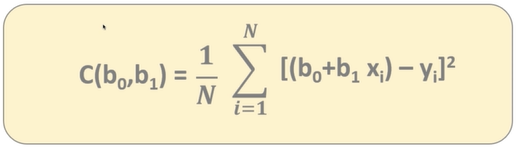

Если обобщить, то у нас есть функция затрат и обычно в линейной регрессии мы имеем дело с со средней ошибкой - разница между предсказанием модели и реальным значением (в квадрате) и нам необъодимо сложить все значения. Затем необходимо происчитать частичную производную, потому что мы ищем минимум функций затрат.   

learning-rate (альфа-параметр) - скорость обучения:
- небольшая - алгоритм делает небольшие шаги в сторону минимума и требует больше времени чтобы сойтись;
- большая - большие шаги - алгоритм быстрее, но менее точен.

#### Implementation. Реализация.
libraries: numpy, pandas, matplotlib, scikit-learn.

Датасет с ценами на дома.

In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [3]:
house_data = pd.read_csv('jupyter_lab\house_prices.csv')

MSE: 650965.7788663033
R squared value: 0.4928532179037931
[280.6235679]
-43580.743094473495


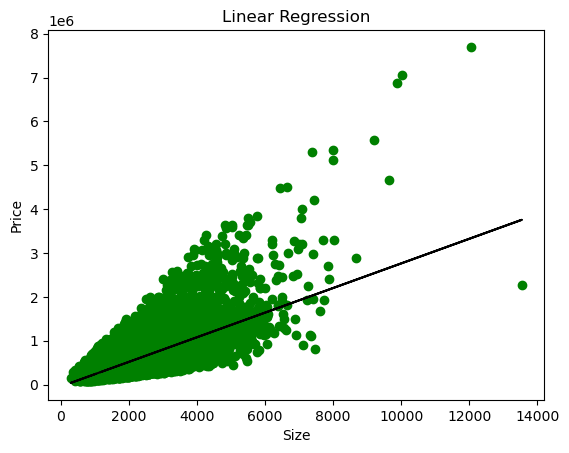

In [12]:
size = house_data['sqft_living'] # Pyhton gets all the values of this column
price = house_data['price']

# We have to transform this dataset, because MO algorithms handle arrays and not data frames
# Transformes DataFrame to array that stores array with single value. And what's important
# - it stores it without an id unlike DataFrames.
x = np.array(size).reshape(-1, 1)
y = np.array(price).reshape(-1, 1)

# we use linear regression and fit() is the model
# to define linear relationship between size and prizes
model = LinearRegression()
model.fit(x, y) # under the hood scikit-learn is going to train the help of gradient descent
# x - признаки, y - целевая переменная

regression_model_mse = mean_squared_error(x, y)
print('MSE:', math.sqrt(regression_model_mse))
print('R squared value:', model.score(x, y))
# R^2 - the higher the better the model fits the data. Measures how strong the linear relationship
# between variables. RSS - Measures the variability left unexplained after performing the regression.
# TSS - measures total variance in y.

# We can get b values after model fit
# b1
print(model.coef_[0])
# b0
print(model.intercept_[0])

# visualizw datset with the fitted model
plt.scatter(x, y, color='green')
plt.plot(x, model.predict(x), color='black')
plt.title('Linear Regression')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

По параметру R видно, что 0.49 низкое значение, значит, что нету линейной взаимосвязи между ценой и размером дома. Если 0.8-0.9, то высок шанс того, что есть прямая зависимость.

In [11]:
print('Prediction:', model.predict([[2000]]))

Prediction: [[517666.39270042]]


#### Logictic Regression.
Линейная регрессия решает проблему регрессии, значит, результат скалярный.
Логистическая регрессия — это модель для классификации, чаще всего бинарной (да/нет, 0/1).
Она моделирует вероятность того, что объект принадлежит к классу 1.

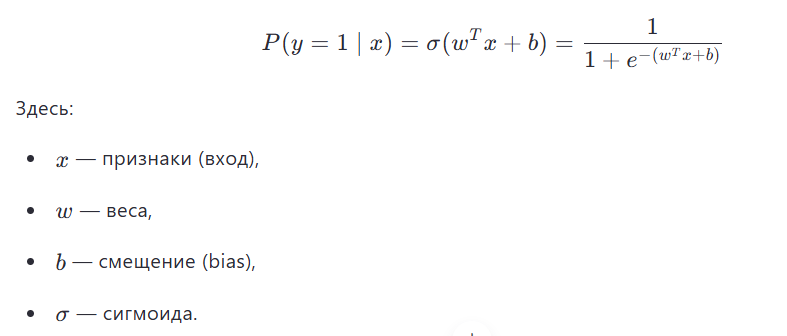

Наша задача — найти такие параметры w и b , чтобы модель как можно точнее предсказывала вероятности по обучающим данным.

///

Логистическая регрессия решает проблему классификации.
- Обычно логистическая регрессия используется для бинарной классификации
- Проблемы как обнаружение спама, предсказывать исполнит ли клиент обязательства по задолженности.
- Назначает вероятность данного исхода.

Функция сигмоиды f(x) = 1/(1+e^(-x))

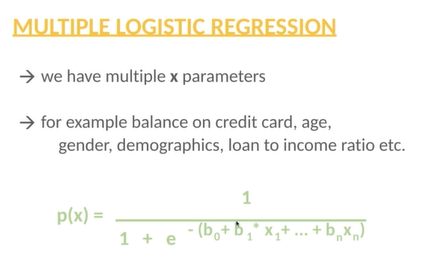

Как найти оптимальное значение параметров b(0,1-n)?
Первый подход - градиентый спуск:

Обычно мы ипсользуем - оценка максимального правдоподобия (Maximum Likelihood Estimation, MLE): метод оценки параметров наблюдений данной статистической модели.

Правдоподобие — это вероятность наблюдать наши данные при заданных параметрах модели.

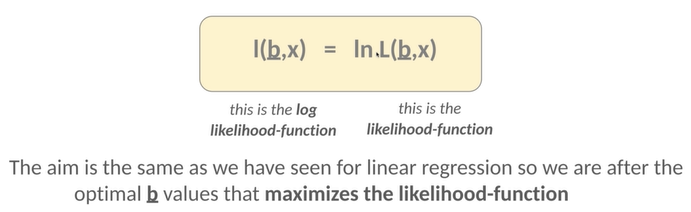

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
credit_data = pd.read_csv('jupyter_lab\credit_data.csv') # fetch data

In [20]:
print(credit_data.head(), credit_data.describe(), credit_data.corr(), sep='\n\n') # describe - count - how many items in dataset


   clientid        income        age         loan       LTI  default
0         1  66155.925095  59.017015  8106.532131  0.122537        0
1         2  34415.153966  48.117153  6564.745018  0.190752        0
2         3  57317.170063  63.108049  8020.953296  0.139940        0
3         4  42709.534201  45.751972  6103.642260  0.142911        0
4         5  66952.688845  18.584336  8770.099235  0.130989        1

          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.

Статистика:
Expected value E(x) случайной переменной x это среднее значение в популяции.
Variance - ожидаемое значение из квадратного отклонения переменных из среднего (всегда положетельна). Мы можем определи std как квадрат различия.
Ковариация(мера линейной зависимости двух величин) - x и y - это мера совместной изменчивости двух случайных величин.
Проблемы ковариации - пространственная мера и она не нормализована, поэтому сложно сравнивать датасеты с большими различиями в распространении.

Корреляция предпочтительней. Это непространтсенная мера насколько две различные переменные различаются. Это и показывает 'print(credit_data.corr())' - прим. в данном датасете age-income - негативная корреляция: чем выше возраст, тем меньше доход. А в age-loan - позитивная корреляция: выше возраст - выше размер кредита.

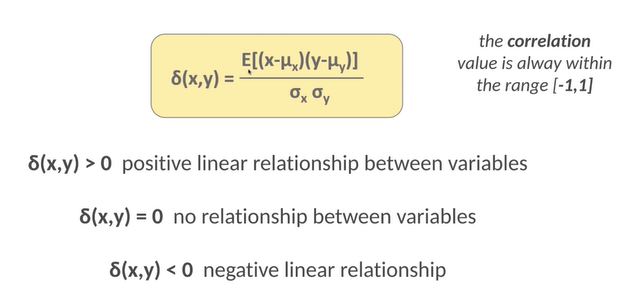

In [45]:
# multiple LR problem
features = credit_data[['income', 'age', 'loan']] # в формуле x1, x2, x3
target = credit_data.default

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
# we are going to use 70% of the dataset in order to find all b-values(0-3) with the help of the gradient descent

model = LogisticRegression()
model.fit(feature_train, target_train)

print(model.coef_) # b1-b3
print(model.intercept_) # b0

predictions = model.predict(feature_test) # make predictions based only on features

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[-2.44240413e-04 -3.59073597e-01  1.75106200e-03]]
[10.24781545]
[[505  17]
 [ 15  63]]
0.9466666666666667


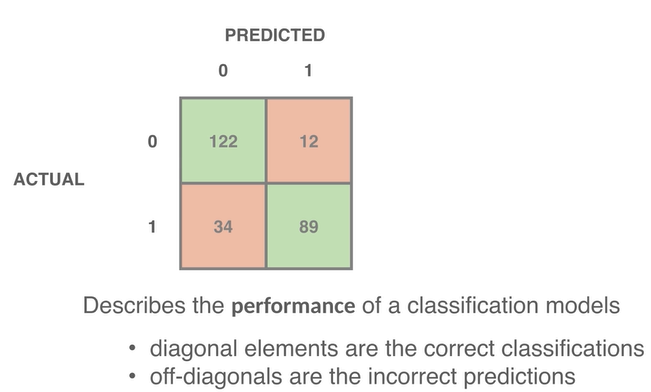
Точность - сумма диагональных значений/все значения

Почему ЛР - линейный классификатор?
Decision boundary - граница принятия решения появляется когда модель с равной вероятность может предсказать каждый класс (0.5).

threshold - порог (0.5) - граница принятия решения, которая разделяет классы на выходе.

#### Cross Validation. Кросс-валидация.
We would like to see accuracy when dealing with new data.

##### Overfitting. Переобучение. Underfitting. Недообучение.
Переобучение. Модель обучилась слишком хорошо на учебном датасете.
- Очень точен на train, но очень плохие результаты на тесте (из-за слишком сложной модели);
- Модель запоминает 'шумы' вместо настоящих взаимоотношений между переменными в данных.

Недообучение. Модель обучилась слишком плохо на учебном датасете.
- Не отследила тренды тренировочных данных;
- Это случай если мы использовали слишком простые модели для проблемы.

##### K-Folds Cross Validation.Перекрестная проверка K-образных сгибов.
Помогает избежать как переобучения, так и недообучения. Цель - обобщить модель для новых наборов данных. Мы используем всю дату для обучения (не нужно разделять оригинальный датасет).

Мы делим все данные на k-folds (чанки). Мы проводим k отдельных обучающих экспериментов с k-1 кратностью для обучения и 1 кратным для тестового набора и, наконец, усредняем результаты этого k-эксперимента.
То есть каждый чанк хотя бы раз становится тестовым по очереди и несколько раз обучающим. Таким образом, каждый чанк участвует в обучении и каждый в тесте.

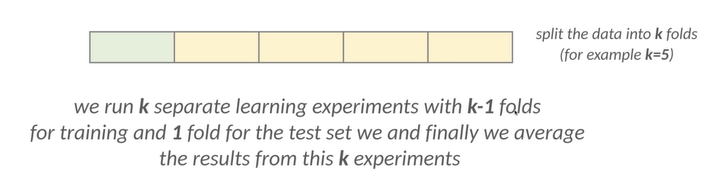

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [22]:
credit_data = pd.read_csv('jupyter_lab\credit_data.csv')

In [30]:
features = credit_data[['income', 'age', 'loan']]
target = credit_data.default

X = np.array(features).reshape(-1,3)
y = np.array(target)

print(features, '\n\n --- После преобразования в массив --- \n\n', X)

            income        age         loan
0     66155.925095  59.017015  8106.532131
1     34415.153966  48.117153  6564.745018
2     57317.170063  63.108049  8020.953296
3     42709.534201  45.751972  6103.642260
4     66952.688845  18.584336  8770.099235
...            ...        ...          ...
1995  59221.044874  48.518179  1926.729397
1996  69516.127573  23.162104  3503.176156
1997  44311.449262  28.017167  5522.786693
1998  43756.056605  63.971796  1622.722598
1999  69436.579552  56.152617  7378.833599

[2000 rows x 3 columns] 

 --- После преобразования в массив --- 

 [[6.61559251e+04 5.90170151e+01 8.10653213e+03]
 [3.44151540e+04 4.81171531e+01 6.56474502e+03]
 [5.73171701e+04 6.31080495e+01 8.02095330e+03]
 ...
 [4.43114493e+04 2.80171669e+01 5.52278669e+03]
 [4.37560566e+04 6.39717958e+01 1.62272260e+03]
 [6.94365796e+04 5.61526170e+01 7.37883360e+03]]


In [33]:
model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=3) # cv - folds parameter, default is 3

print(predicted['test_score']) # predicted - словарь, поэтому нам надо определить ключи 
# ещё варианты train_score, fit_time, score_time, estimator
print(np.mean(predicted['test_score']))

[0.94752624 0.95202399 0.93693694]
0.9454957206081644


#### K-Nearest Neighbors Classifier. K-Классификатор ближайших соседей.
**kNN классификатор может классифицировать примеры, назначая им класс с наибольшим значением похожих меток. Простой, но крайне эффективный алгоритм.**

- **kNN** хорошо подходит для задач мультиклассовой классификации, где отношения между признаками очень сложные для понимания.
- Алгоритму нужна **функция расстояния**, чтобы классифицировать новые точки данных. Евклидово-расстояние или Манхэттэн.
- **lazy learner**: Мы просто храним данные для обучения, обучение очень быстрое, так как его по сути нету. Но долгое предсказание, так как расчёт расстояний ресурсоёмкое занятие.
((*ЛинейнаяР - не lazy learner, так как у нас есть датасет и среднеквадратичная ошибка + аглорит оптимизации (градиентный спуск), чтобы минимизировать ошибку, чтобы найти оптимальные параметры b.*
*ЛогистическаяР - нам нужо сконструировать likelihood function (функцию правдопадобия) и оптимизировать с maximum likelihood estimator(вычислитель максимального правдоподобия)*))
- это обучение без параметров (non-papametric).

**Distance Metrics. Показатели расстояния.**
Расстояние между двумя точками. Евклидово расстояние.
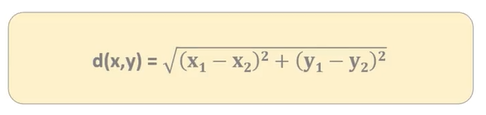
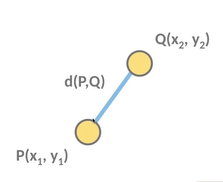
Манхэттэн-расстояние.
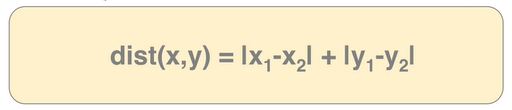
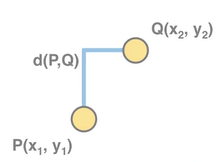

Если больше 3 измерений, то добавляются ещё точки кроме x,y - z и так далее.

**Что использовать?**:
- Евклидово расстояние предпочтительнее, когда мало измерений. Низкая масштабируемость.
- Манхэттэн более предпочтительнее, так как хорошо масштабируется с увиличением кол-ва измерений.

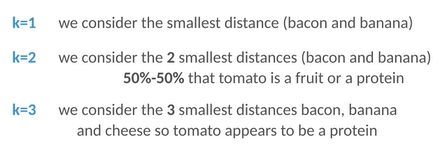

Метка даётся в зависимости от того, каких метод рядом больше всего.

**Bias and Variance trade-off. Компромисс между предвзятостью и дисперсией**
Предвзятость (bias) - ошибка из неправильных предположений в алгоритме. Высокая превзятость (недообучение) слишом упрощает модель и пропускает взаимосвязи между признаками и целевыми переменными.
По сути это разница между предсказанием модели и метки.
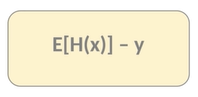

Дисперсия (variance, показатель разброса данных воркуг среднего значения) - ошибка из чувтсвительности к случайным колебаниям в наборе обучения. Большая дисперсия (переобучение) слишком фокусируется на данных обучения.
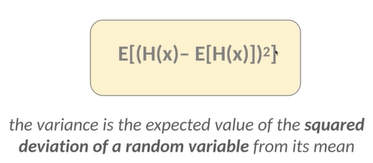

**Как выбрать оптимальное значение К (соседей)?**
Маленькое К: шумные данные или выбросы имеет большое влияние. Высокая дисперсия, низкая предвзятость.
Большое К: классификатор будет часто склоняться к классу большинства. Дисперсия небольшая, предвзятость - высокая.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
features = credit_data[['income', 'age', 'loan']]
target = credit_data.default

X = np.array(features).reshape(-1, 3)
y = np.array(target)

**Normalization.Нормализация.**
Признаки обычно преобразуются в диапазон перел применение кНН алгоритма, так как формула расстояния зависит от тоо, как признаки измеряются.
Если определённый признак имеет гораздо больше значений, чем другие, измерение расстояния будет управляться значениями, которые больше.
Поэтому нам надо смаштабировать различные признаки так, чтобы каждый делал одинаковый вклад в формулу расстояний (**min-max normalization or z-transformation**).

**Min-Max Normalization**
Процесс, трансофрмирующий признак так, что все его значения становятся в диапазоне от 0 до 1. How far from 0% to 100% изначальное значение находится в диапазоне между исходными минимумами и максимумами.
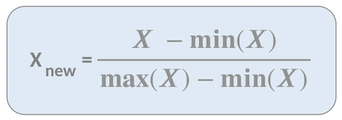
Питон найдёт максимальное и минимальное значение во всех входах. 

**Z-score transformation or Standartization.**
Метод нормализации с помощью среднего и стандартного отклонения.
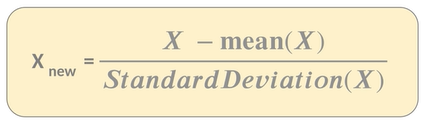

Для анализа главных компонент (PCA, Principal Component Analysis) мы предпочитаем z-score, но для обработки изображений интенсивность пикселей должна быть нормализована, чтобы соответствовать определенному диапазону + нейронные сети требуют данных по шкале от 0 до 1.

In [37]:
print(X)

[[6.61559251e+04 5.90170151e+01 8.10653213e+03]
 [3.44151540e+04 4.81171531e+01 6.56474502e+03]
 [5.73171701e+04 6.31080495e+01 8.02095330e+03]
 ...
 [4.43114493e+04 2.80171669e+01 5.52278669e+03]
 [4.37560566e+04 6.39717958e+01 1.62272260e+03]
 [6.94365796e+04 5.61526170e+01 7.37883360e+03]]


In [39]:
X = preprocessing.MinMaxScaler().fit_transform(X)
print(X)

[[0.9231759  0.89209175 0.58883739]
 [0.28812165 0.65470788 0.47682695]
 [0.74633429 0.9811888  0.58262011]
 ...
 [0.48612202 0.21695807 0.40112895]
 [0.47500998 1.         0.1177903 ]
 [0.98881367 0.82970913 0.53597028]]


In [42]:
feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

model = KNeighborsClassifier(n_neighbors=20) # 20 ближайших соседей, чтобы классифицировать ближайший элемент
fittedModel = model.fit(feature_train, target_train)
predictions = fittedModel.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[519   4]
 [ 10  67]]
0.9766666666666667


In [41]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract as NumPy array early
X = credit_data[['income', 'age', 'loan']].values  # ← .values gives NumPy array
y = credit_data['default'].values

# Scale
X = preprocessing.MinMaxScaler().fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[507   1]
 [ 15  77]]
Accuracy: 0.9733333333333334


In [52]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract as NumPy array early
X = credit_data[['income', 'age', 'loan']].values  # ← .values gives NumPy array
y = credit_data['default'].values

# Scale
X = preprocessing.MinMaxScaler().fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train
model = KNeighborsClassifier(n_neighbors=32)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[506   2]
 [ 15  77]]
Accuracy: 0.9716666666666667


Для подбора кол-ва соседей мы можем использовать Cross Validation. 

In [46]:
from sklearn.model_selection import cross_val_score

In [53]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Подготовка данных
features = credit_data[['income', 'age', 'loan']]
target = credit_data['default']

X = features.values  # сразу как NumPy
y = target.values

# Масштабирование
X = preprocessing.MinMaxScaler().fit_transform(X)

# 2. Разделение ДО любой настройки гиперпараметров!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Подбор k ТОЛЬКО на обучающих данных
cross_valid_scores = []
k_values = list(range(1, 100))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())

# Найдём лучший k
best_k_index = np.argmax(cross_valid_scores)
best_k = k_values[best_k_index]

print('Optimal K:', best_k)

# 4. Обучаем финальную модель с лучшим k на ВСЕМ train
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# 5. Предсказание и оценка на НЕИСПОЛЬЗОВАННОМ test
predictions = final_model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Optimal K: 5
[[504   4]
 [  8  84]]
Accuracy: 0.98


#### Naive Bayes Classifier.
Наивный Байесовский классификатор.

- Хорошо масштабируется под большое количество измерений; 
- Может конкурировать с SVM or Random Forest classifiers;
- Может делать хорошие предсказания даже если датасет небольшой;
- Наивные предположение, что каждая входная переменная (признак) независим;
- Хорошо подходит для **классификации текста**.

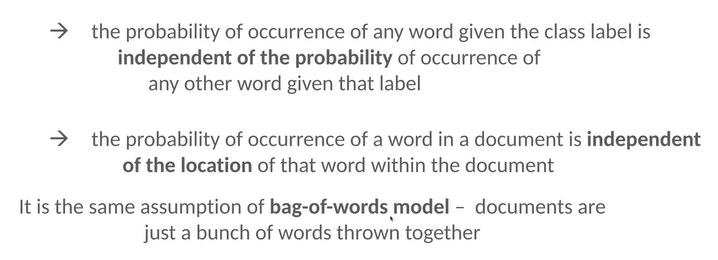
Предположение верно для классификации текста.

Если корреляция 0, то признаки полностью независимы.

Основывается на условной вероятности (Вероятность наступления события А, если событие В произошло).
Теорема Байеса, утверждающая, что мы можем разложить условную вероятность.

Признаки независимы, поэтому проще вычислить вероятность.

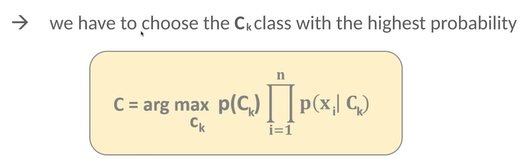

In [54]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
X = credit_data[['income', 'age', 'loan']]
y = credit_data['default']

print(X.corr()) # features are not independant

          income       age      loan
income  1.000000 -0.034984  0.441117
age    -0.034984  1.000000  0.006561
loan    0.441117  0.006561  1.000000


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[499   9]
 [ 38  54]]
Accuracy: 0.9216666666666666


**Clustering**
Модель, способная группировать похожие документы или тексты.

Типы:
- Семантический кластеринг (Semantic) - Фокусируется на значении слов, фраз. Пытается группировать на основе значения, контекста, а не просто на появление специфичных слов. Word embeddings as BERT or word2vec.
- Тематический (Thematic) - Группирует документы по основным темам. Больше внимание на всеобъемлющие темы или категории, а не значения слов (TF-IDF, Term Frequency-Inverse Document Frequency).

Провблема - некоторые слова (предлоги) не несут смысла.

TF-IDF - статистическое измерение, используемое для измерения важности слова в документе, которое относится к набору документов.

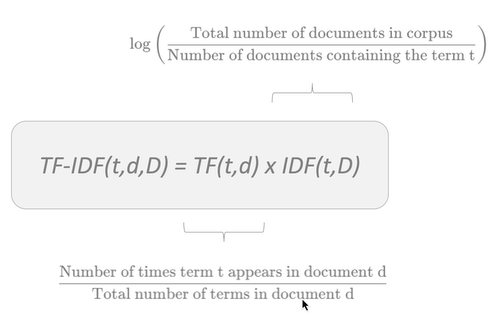

Особенность, что этот метод повышает важность тех слов для данной тематики, которые часто встречаются в данных текстах, но в то же время их почти нету или нет в других тематиках. Значит, они уникальны в данном контексте.

In [15]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# we will fetch only these categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

training_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

print('\n'.join(training_data.data[0].split('\n')[:10]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.



In [16]:
print('Target is:', training_data.target_names[training_data.target[0]])

Target is: comp.graphics


In [17]:
count_vector = CountVectorizer() # tokenizer under the hood
x_train_counts = count_vector.fit_transform(training_data.data)

print(count_vector.vocabulary_) # value - number of occurences, key - given word itself

{'from': 14887, 'sd345': 29022, 'city': 8696, 'ac': 4017, 'uk': 33256, 'michael': 21661, 'collier': 9031, 'subject': 31077, 'converting': 9805, 'images': 17366, 'to': 32493, 'hp': 16916, 'laserjet': 19780, 'iii': 17302, 'nntp': 23122, 'posting': 25663, 'host': 16881, 'hampton': 16082, 'organization': 23915, 'the': 32142, 'university': 33597, 'lines': 20253, '14': 587, 'does': 12051, 'anyone': 5201, 'know': 19458, 'of': 23610, 'good': 15576, 'way': 34755, 'standard': 30623, 'pc': 24651, 'application': 5285, 'pd': 24677, 'utility': 33915, 'convert': 9801, 'tif': 32391, 'img': 17389, 'tga': 32116, 'files': 14281, 'into': 18268, 'format': 14676, 'we': 34775, 'would': 35312, 'also': 4808, 'like': 20198, 'do': 12014, 'same': 28619, 'hpgl': 16927, 'plotter': 25361, 'please': 25337, 'email': 12833, 'any': 5195, 'response': 27836, 'is': 18474, 'this': 32270, 'correct': 9932, 'group': 15837, 'thanks': 32135, 'in': 17556, 'advance': 4378, 'programmer': 26175, 'computer': 9338, 'unit': 33572, 'tel

In [18]:
# we transform thw word occurences into tf-idf
# TfidfVectorizer = CountVectorizer + TfidfTransformer
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer .fit_transform(x_train_counts)

print(x_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 365886 stored elements and shape (2257, 35788)>
  Coords	Values
  (0, 177)	0.25612026239119895
  (0, 230)	0.1348710554299733
  (0, 587)	0.05966162012870271
  (0, 2326)	0.24645540709354397
  (0, 3062)	0.10783602957370853
  (0, 3166)	0.1348710554299733
  (0, 4017)	0.12491817585060791
  (0, 4378)	0.0686611288079694
  (0, 4808)	0.03900412426100995
  (0, 5195)	0.0310951485922154
  (0, 5201)	0.04316199700711876
  (0, 5285)	0.08413454409085573
  (0, 8696)	0.314400065528974
  (0, 9031)	0.3841803935867984
  (0, 9338)	0.049671845493333165
  (0, 9801)	0.07830787326179856
  (0, 9805)	0.21567205914741705
  (0, 9932)	0.06350565647195339
  (0, 12014)	0.031042954435189937
  (0, 12051)	0.037793189755988436
  (0, 12541)	0.1348710554299733
  (0, 12833)	0.125601499991304
  (0, 14085)	0.06666452137859726
  (0, 14281)	0.13635772403701527
  (0, 14676)	0.07691883385947053
  :	:
  (2256, 24052)	0.03818816835979169
  (2256, 25560)	0.09025646935333186

In [19]:
model = MultinomialNB().fit(x_train_tfidf, training_data.target)

In [21]:
new = ['this has nothing to do with church or religion', 'Software Engineering is getting hotter']
x_new_counts = count_vector.transform(new)
x_new_tfidf = tfidf_transformer.transform(x_new_counts)

predicted = model.predict(x_new_tfidf)

for doc, category in zip(new, predicted):
    print(f'{doc} -> {training_data.target_names[category]}')

this has nothing to do with church or religion -> soc.religion.christian
Software Engineering is getting hotter -> comp.graphics


In [ ]:
# 2_ver
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
training_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Прямо применяем TfidfVectorizer к сырым текстам
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(training_data.data)

model = MultinomialNB().fit(x_train_tfidf, training_data.target)

Проблема с Наивным Байесом в том, что это алгоритм с учителем и нам необходимы целевые метки, новые он создать не может. Алгоритм K-means clustering способен находить похожие темы, что значит, что мы можем группировать тексты без целевых меток.

#### Support Vector Machines (SVM). Вычисление опорных векторов.
Алгоритм классификации с учителем (уже не такие популярные с появлением нейронных сетей и глубокого обучения).
- Может работать с бесконечным числом измерений;
- Он может определить предел (margin, границу принятия решения) между точками данных в многомерном пространстве;
- Цель заключается в нахождении плоской границы (также известной как гиперлейн (hyperlane)), которая приводит к однородности данных;
- Хорошее разделение данных достигается за счёт hyperlane, котороая имеет наибольшее расстояние до ближайшей точки обучения данных любого класса, так как в общем - чем больше предел, тем ниже общая ошибка классификатора;
- С алгоритмом SVM мы максимизируем предел.

Нам нужно найти такой предел, чтобы он имел максимально возможную ширину линии, разделяющую классы.
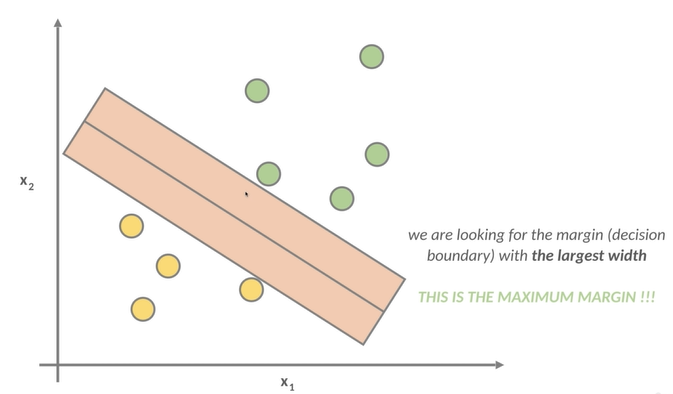

Точки, находящиеся ближе всего к пределк называются поддерживающими векторами - support-vectors.
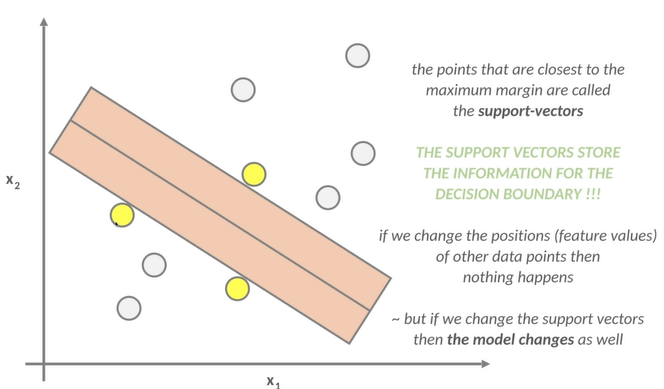

Каждый класс имеет хотя бы один поддерживающий-вектор. Мы можем перестраивать гиперлэйн, как и границу принятия решений, исключительно с помощью поддерживающих векторов.

Модель классификации может храниться даже с огромным числом признаков.

Гиперлейн - это подпространство, которое имеет на одно измерение меньше, чем окружающее пространство.

SVM учит концепты (признаки), которые не были явно измерены в оригинальном датастете с помощью функции kernel (функция ядра). После применения функции ядра ко всем точка мы получаем пространство с увеличиненным количеством измерений. Это нужно, чтобы было проще разделить датасет, но эта функция довольно ресурсоёмкая. 

Kernel trick (ядерный трюк) в SVM (Support Vector Machines) — это метод, который позволяет алгоритму работать в пространстве более высокой размерности признаков, не вычисляя координаты данных в этом пространстве. Это полезно для нелинейных данных, так как алгоритм может найти гиперплоскость, которая эффективно разделяет классы. 
Типы - линейное ядро, полиномиальное ядро, ядро гауссовой радиальной базисной функции.

**Плюсы**:
- Может быть использован для регрессии и классификации;
- memory friendly, так как использует поддерживающие векторы;
- Working fine in infinite dimensions;
- Проще для использования, чем нейронные сети.

**Недостатки**:
- Большое число параметров и ядер - сложный для понимания;
- Медленный, если много признаков
- Нету вероятностей.

In [23]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets

In [31]:
# data - contains features (4 features in this dataset), target - contains target variables
iris_data = datasets.load_iris()

print(iris_data.data.shape, iris_data.data.ndim)

(150, 4) 2


In [49]:
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 36)

In [50]:
model = svm.SVC()
fit_model = model.fit(X_train, y_train)
predictions = fit_model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
0.9777777777777777


Важные параметры SVC: gamma and C.
- Gamma определяет насколько далеко распространяется влияние единственной точки данных (низкое значение - влиянение распространяется далеко, высокое - близко).
- C - находит компомисс в простоте поверхности гиперплайна + неправильную классификацию обучающих примеров, то есть примеры которые оказались не в своём кластере (низкое - гладкая/простая поверхность гиперлайна, высокое - все обучающие примеры классифицированы корректно, но слишком сложная поврехность (похоже на переобучение)).

In [33]:
from sklearn.model_selection import GridSearchCV

In [51]:
model = svm.SVC()

# 144 possible combinations C_num*gamma_num*kernel_num
param_grid = {
    'C':[0.1, 1, 5, 10, 20, 30 , 40, 50, 60, 70, 100, 200],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(model, param_grid, refit=True) # refit - bool, refit estimator with best found parameter
grid.fit(X_train, y_train)

print('Best estimator: ', grid.best_estimator_)
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

Best estimator:  SVC(C=50, gamma=0.01)
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
1.0


#### SVM. Image Digit Recognition.

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

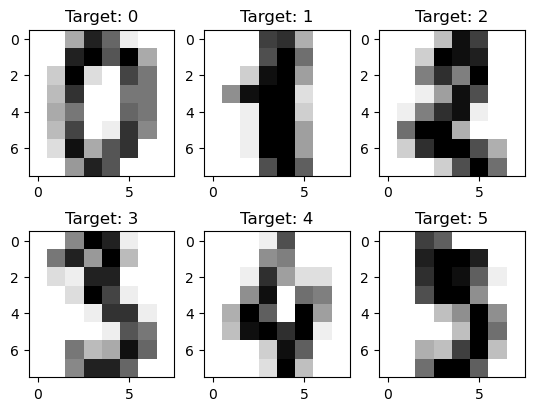

In [56]:
digits = datasets.load_digits()
# features - images, target - target numbers

images_label = list(zip(digits.images, digits.target))
# каждое изображение хранить в двумерной матрице 8*8, 
# которая обозначает уровень того, насколько тёмный пиксель

for index, (image, label) in enumerate(images_label[:6]):
    plt.subplot(2, 3, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Target: {label}')

Чтобы применить классификатор на эти данные нужно выровнить изображение - вместо матрицы 8х8 нам нужно использовать одноразмерную матрицу из 64 элементов.

In [63]:
data = digits.images.reshape((len(digits.images), -1))

classifier = svm.SVC(gamma=0.001)

# 75% of data is for training
train_test_split = int(len(digits.images) * 0.75)
classifier.fit(data[:train_test_split], digits.target[:train_test_split])

expected = digits.target[train_test_split:]
predicted = classifier.predict(data[train_test_split:])

print(metrics.confusion_matrix(expected, predicted))
print(accuracy_score(expected, predicted))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]
0.9666666666666667


#### Decision Trees. Деревья решений.
Подход с учителем. В основном для решения проблем классификации, но может быть использованы и для регрессии.
- Хорошо работает как с категориальными (дискретные метки, не имеющие числового смысла), так и с непрерывными входными переменными (числовые признаки в любом диапазоне);
- Каждый узел дерева представляет собой точку решения или тест признака. Ветки отражают результат этих тестов. Корень представляет собой весь датасет, который потом разделяется на подмножество с корневым узлом, соответствующий наилучшему предиктору. Внутренние узлы - точки решений. Листья - финальный вывод модели или предсказание определённого пути дерева;
- Каждое разделение мы избавляемся от данного признака из набора данных. Со временем каждая ветвь избавится от данного признака до тех пор пока мы не останемся с предикторами.

3 алгоритма построения дерева решения:
- Gini Index approach (Подход с использованием индекса Джини);
- Information Entropy (ID3 or C4.5 methods) (Информационная энтропия (методы ID3 или C4.5));
- Variance Reduction (Уменьшение дисперсии).

Для построения дерева сначала необходимо найти наиболее ревелантный признак.
Дерево делится до тех пор, пока результат не будет одинаковый для всех оставшихся параметров. 

**ID3** - жадный поиск возможных ветвей сверху вниз. Для построения деревьев используется энтропия и получение информации. Более дорогой метод, чем Gini Index approach из-за того, что нужно вычислять логарифмическую функцию.
Для полностью однородного набора данных (всё истинно/ всё ложно) энтропия равна 0. Если набор данных разделен поровну (одинаковое количество истинных и ложных данных), энтропия равна 1.
Если энтропия равна нулю - разделения заканчиваются. Если от 0 до 1 - продолжается. Высокая энтропия - много неопределённости в системе.

Information gain рассчитывается на основе энтропии. Признак с наибольшим IG выбирается для разделения датасета по нему, чтобы убедиться, что разделение убирается неуверенность(энтропию) насчёт целевого значения как можно больше. 

**Подход с использованием индекса Джини** - жадный поиск возможных ветвей сверху вниз. Использует индекс Джини вместо энтропии. Этот подход фокусируется на вероятности неправильной классификации экземпляра, когда он помечен согласно распределению по классам.
Для полностью однородного набора данных (всё истинно/ всё ложно) индекс равен 0. Если набор данных разделен поровну (одинаковое количество истинных и ложных данных) - 0.5.
Мы хотим убедиться, что индекс как можно меньше. Признак чей индекс меньше выбирается как признак для разделения.

**Плюсы деревьев решений**:
- Проще понимать и интерпретировать;
- Подходит и для числовых и для категориальных данных (не нужна предобработка потипу one-hot encoding);
- Может дать представление какие признаки наиболее важные;
- Подходит для небольших наборов данных;
- Нет предположений (non-parametric), подходит для сложных датасетов.

**Минусы:**
- Высокий шанс переобучения, особенно если очень глубокие;
- Нестабильные (высокая дисперсия). Небольшие изменения в данных могут привести к совершенно другим деревьям из-за иерархической природы разделени. Это делает деревья менее надежными;
- Предпочтение функциям с большим количеством уровней. Категориальные или отличительные признаки чаще становятся избранными для разделения, так как возможно у них выше Information Gain;
- Не подходит для данных  с большим количеством признаков, так как проблемы с осмысленными разделениями и повышение шанса переобучения;
- Плохо работает с несбалансированными данными. Если один класс доминирует, алгоритм может больше склоняться к нему - зуже решения для класс меньшинств;
- Greedy splitting - выбирает наилучший раздел жадно - не возвращается назад или пересматривает прошлые решения.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

param_grid = {'max_depth': range(1, 10)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)

print('best param: ', tree.best_params_)

best param:  {'max_depth': 6}


In [72]:
grid_predictions = tree.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


#### Смещение/Дисперсия.
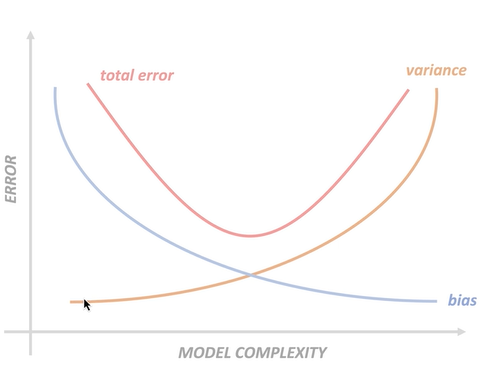

**Pruning.Обрезка**
Дерево с меньшим количеством разделений может быть более корректным предсказателем по цене немного повышенной предвзятости.
РЕШЕНИЕ: вырастить огромное дерево и потом обрезать его, чтобы создать небольшое поддерево (weakest link pruning, обрезка самого слабого звена).
Типы:
- Ранняя остановка на определённой глубине или при определённом кол-ве узлов;
- Пост-обрезка, которая убирает ветки в уже полностью выращенном дереве с помощью кросс-валидации.

**Bagging.Упаковочный подход.**
OR Bootstrap Aggregation (Агрегация начальной загрузки).
Суть - соединение слабых учеников может создать мощный классификатор (мудрость толпы).
Базовая идея - объединить несколько эксземпляров одной модели на разных подможествах набора данных и соединить их предсказания.
Обычно используются блоки принятия решений (decision chunks) с глубиной 1.

Можно уменьшить variance без повышения предвзятости, усреднив набор наблюдений:
- Создайте несколько подмножеств данных, выбрав выборку с заменой. Это означает, что каждое подмножество может содержать повторяющиеся примеры и может не включать другие.
- Вырастите деревья принятия решений (полностью выращенные, необрезанные и независимые деревья) на этих подмножествах, чтобы каждое подмножество данных использовалось для обучения отдельной модели.
- Мы получим результаты всех подмножеств с независимыми моделями, которые обучили.
- Соединить предсказания.
- Для классификации - голосование большинства. Регрессия - усреднённое значение.

Проблемы Bagging: построенные деревья имеют высокую степень корреляции, так как они используют весь набор признаков.
Почему корреляция поялвяется? Каждый датасет имеет сильный признак и упаковочные деревья стремяться делать одинаковые решения, поэтому они могут выглядть похожими.

**Random Forest Classifier.Классификатор случайных лесов**
Лучше чем bagging, так как декоррелирует отдельно взятые деревья - это уменьшает varience при усреднении деревьев.
При каждом разделении деревы выбирается случайное подмножество признаков из всего датасета. Рассматриваемое число признаков обычно примерно рано квадратному корню общего числа признаков.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

In [5]:
credit_data = pd.read_csv('jupyter_lab\credit_data.csv')

X = credit_data[['income', 'age', 'loan']]
y = credit_data.default

X = np.array(X).reshape(-1, 3)
y = np.array(y)

model = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
predicted = cross_validate(model, X, y, cv=10)
print(np.mean(predicted['test_score']))


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# print(confusion_matrix(y_test, predictions))
# print(accuracy_score(y_test, predictions))

0.9899999999999999


In [7]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

digit_data = load_digits()
X = digit_data.images.reshape((len(digit_data.images), -1))
y = digit_data.target

model = RandomForestClassifier(n_jobs=-1, max_features='sqrt', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 100, 500, 1000],
    'max_depth': [1, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 10, 15, 30, 50]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Optional: evaluate on test set
grid_predictions = grid_search.predict(X_test)

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 500}


### Boosting.
- Классификация и регрессия;
- Помогает снизить variance и bias;
- bagging - создаёт несколько копий оригинальных данных - создаёт несколько деревьев решений на копиях и соединяет все деревья, чтобы делать предсказания (деревья создаются независимо);
- boosting - последовательнsq алгоритм, все деревья растут последовательно, поэтому каждое новое растущее использует информацию из предыдущего дерева.

Довольно нелогичная теория: слабый ученик не способен делать правильные прогнозы:
- слабый ученик лишь немного лучше, чем случайная догадка или подбрасывание монетки, например: деревья решений глубиной 1;
- объединение слабых учеников может оказаться чрезвычайно мощным классификатором;
- подбирая небольшие деревья (пни принятия решений (decision stumps)), мы постепенно улучшаем конечный результат в тех случаях, когда он не работает должным образом

Мы рассмотрим алгоритм адаптивного повышения, AdaBoost.
Viola-Jones Face Detection algorithm uses boosting - combines decision stumps to detect faces:
- Слабые ученики решают содержит ли данная секция изображения лицо или нет.
- Очень точный и быстрый алгоритм.

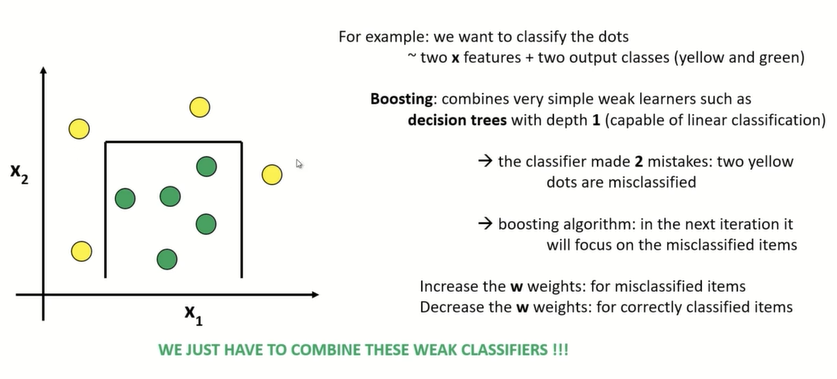


**Boosting vs Bagging**
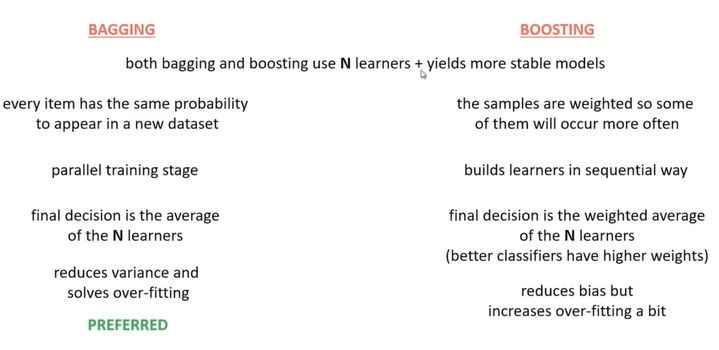

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import datasets, preprocessing
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

In [2]:
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 100 n_estimators - decision trees
model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
model.fit(X_train, y_train)
model_predict = model.predict(X_test)

print(confusion_matrix(y_test, model_predict))
print(accuracy_score(y_test, model_predict))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
0.9333333333333333


MinMaxScaler() - масштабирование данных к значениях от 0 до 1 для алгоритмам чувствительных к масштабам данных, чтобы алгоритмы не были предвзяты к признакам с более высоким значением. также улучшает производительность модели из-за лучшей сходимости.

In [10]:
def is_tasty(quality):
    return 1 if quality >= 7 else 0

# Load data
data = pd.read_csv('jupyter_lab\\wine.csv', sep=';')

# Features and target
features = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
data['tasty'] = data['quality'].apply(is_tasty)
targets = data['tasty']

# Prepare arrays
X = np.array(features)
y = np.array(targets)

# Scale features
X = preprocessing.MinMaxScaler().fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_dist = {
    'n_estimators': [10, 50, 200],
    'learning_rate': [0.01, 0.05, 0.3, 1]
}

grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=param_dist,
    cv=10,
    scoring='accuracy'  # optional but explicit
)

grid_search.fit(X_train, y_train)

# Predict and evaluate
predictions = grid_search.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Best params:", grid_search.best_params_)

[[705  48]
 [152  75]]
Accuracy: 0.7959183673469388
Best params: {'learning_rate': 1, 'n_estimators': 200}


#### Principal Component Analysis (PCA). Анализ основных компонентов.
- Техника для уменьшения разерности.
- Преобразует датасет с большим кол-вом признаков в сет помешьше с некоррелируемыми признаками (principal components, основные элементы).
- Цель - удержать как можно больше информации (or variance (дисперсии)).
- Создаёт новые признаки (основные элементы) - линейные комбинации исходных признаков. 

**Корреляция и основные компоненты**
В наборе данных о кредитном скоринге признаки loan и LTI - коррелируют. Мы можем уничтожить несколько маловыжных признаков и оставить только важные. Мы можем убрать коллерированные признаки и уменьшить размерность проблемы.

- Ковариационная матрица (или корреляционная матрица) - отражает взаимоотношения между признаками;
- Алгоритм использует матрицу, чтобы выбрать направления (основные компоненты) в сторону увеличения дисперсии;
- Определяет собственные векторы (eigenvectors, направления) и собственные значения (eigenvalues, объясненная дисперсия) ковариационной матрицы;
- eigenvectors определяют новые оси (основные компоненты) в преобразованное пространство и eigenvalues определяет значение важности каждой оси.

*Собственный вектор — понятие в линейной алгебре, определяемое для произвольного линейного оператора как ненулевой вектор, применение к которому оператора дает коллинеарный вектор — тот же вектор, умноженный на некоторое скалярное значение.*

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

## Deep Learning

# /////////////////

### Object Oriented Programming

OOP. ООП.
- Модульный (modularity): обеспечивает объектно-ориентированное разделение кода и поведения;
- Расширяемый (extensibility): объекты могут быть расширены, чтобы включить новое поведение;
- Возможность повторного использования (reusability) объектов везде в приложении;
- Проще поддерживать и обновлять.

ООП-ориентированные программы обычно медленнее, чем основанные на процедурах, так как необходимо выполнить больше инструкций.

Классы - шаблоны (чертежи) для создания объектов.
Мы определяем переменные, функции и поведения классов => можем создать экземпляр.

Объекты - это созданные экземпляры классов. Почти всё в Питоне - объекты.
Инкапсуляция - фундаментальная особенность ООП - возможность группировать переменные и функции

#### Классы и объекты. Classes and objects. Инкапсуляция данных и поведения.
    'class Example:
        # блок инициализации - конструктор
        def __init__(self, name, age):
            self.name = name # self - ссылка на экземпляр класса. Значит мы имеем доступ к переменным связанных с экземпляром
            self.age = age

        def show_name(self): # self ссылается на экземпляр ассоциирующийся Example
            print('My name is %s ' % (self.name, self.age))

    # Мы использовали конструктор, чтобы вставить значения
    e = Example('Kevin', 25)
    e.show_name()'

Аргументы - позиционные. Но можно указать ключевые слова, чтобы поменять порядок.
- e = Example(name='Kevin', age=25)...
Также можно указать в функции дефолтное значение.
- def __init__(self, name, age=20)...


#### Переменные экземпляров и классов. 
Переменные класса - эти переменные и значения общедоступны для всех экземпляров класса - класс владеет переменной. (Инициализируются вне конструктора, внутри класса)
Переменные экземпляра принадлежат данному экземпляру класса. Значение этих переменных может отличаться в зависимости от экземпляра. (Инициируются в конструкторе)

#### ИНКАПСУЛЯЦИЯ. Encapsulation

Цель инкапсуляции (скрывание данных) - скрыть детали выполнения от пользователей.
Использование приватных переменных - одна из форм инкапсуляции. Могут быть доступны только из данного класса, но не снаружи.

Нету по-настоящему приватных переменных. Чтобы добиться чего-то похожего на приватные перемнный нужно использовать символ подчёркивания.
Один раз - показатель программистам, что переменная приватна (Не надо вызывать вне класса).
Двойная - переименовывание переменной (name mangling, искажение имени). При вызове выдаст ошибку.

Но двойное подчёркивание не делает полностью приватным. Все переменные класса можно посмотреть через метод dir(), но к приватным добавит нижнее подчёркивание и название класса. Таким же способом можно и вызвать переменную.

#### НАСЛЕДОВАНИЕ. Inheritance.

Позволяет определить класс (дочерний или наследуемый), наследуемый все свойства и функции из другого класса (родительский класс).
Мы может определять поведение (переменные и свойства) только один раз в классе и после мы можем повторно использовать это поведение в других класса без дупликации кода.

    '
    class Algorithm:
        # class variable
        general message = '...'
    
    class SortingAlgorithm(Algorithm): # child class
        # class variable
        sorting_message = 'Sort'
    
    sorting_algorithm =  SortingAlgorithm()
    '
Через SortingAlgorithm() можно обращаться к переменны родительского класса.

class User:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def show_user(self):
        print('%s %s' % (self.name, self.age))

class MediaUser(User):
    # super keyword is going to call parent class
    def __init__(self, name, age):
        super().__init__(name, age)

media_user = MediaUser('Adam', 35)
media_user.show_user()

#### Function (method) override. Переопределение функции (метода).
Что будет если использовать метод, вызывая дочерний класс, который уже представлен в родительском классе? - Питон будет использовать метод из дочернего класса.

#### АБСТРАКЦИЯ и ПОЛИМОРФИЗМ. Abstraction and Polymorphism.
Полиморфизм - способность объекта принимать разные формы. (прим. функция len() может считать длину разных объектов - списки, строки, словари и так далее).
Достигается за счёт наследования и абстракции.
Ещё назвают динамической привязкой.

Например нам надо реализовать несколько сортирующих алгоритмов. Мы создаём абстрактный класс (родительский) - объединяющий все их похожие свойства. Нам всё равно на конкретную реализацию внутри сортирующего алгоритма (пользователь выберет), мы только знаем что нужно вызвать sort().

Пустой объект создаётся как:
sorting_algorithm = None

##### The __str__ function.
Сделать вывод объекта понятным для человека.
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("Алиса", 30)
print(p)  # Вывод: <__main__.Person object at 0x7f8b8c0d5f70>

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __str__(self):
        return f"Человек по имени {self.name}, возраст {self.age}"

p = Person("Алиса", 30)
print(p)  # Вывод: Человек по имени Алиса, возраст 30

#### Comparing objects
Мы можем переопределить стандартные функции для данных объектов, например, функцию сравнения через вызов '__eq__', если её определить в классе и написать свою логику. 

### NumPy

Numerical Python - для манипуляций с массивами. В питоне нету настоящих массивов, потому что почти всё является объектами.

Можно создать массив из списка.
numpy_array = np.array(python_list). После этого преобразования элементы массива будут находиться рядом друг с другом в памяти.

a = np.array([])

В списках можно хранить данные разных типов, в массивах нельзя, либо он всё преобразует в строки.
Можно обновлять элементы на основе индексов.
Можно вставлять элементы с помощью insert() на основе индексов.
a = np.array([items])
a = np.insert(array, index, item)

Размерность.
array.size - количество элементов в массиве.
array.ndim - возвращает размерность.
array.shape - количество элементов в каждом измерении массива.

Несколько измерений массива ([[items], [items]])

Чтобы пройтись по всему массиву:
for row in array:
    for item in row:
        print(item)

reshape - можно изменить измерение массива. 

Можно обоначить количество переменных через ndmin параметр. 
array_name = np.array([1, 2, 3], ndmin = 3)

#### Data Types.
array_name = np.array([1, 2, 3], dtype = 'i') # 'f' - for float, 'S' - string, 'uint' - unsigned integers if we want represent numbers greater than 0. 
Если мы укажем тип то хранение будет не в 8 байтах, а в 4. Если мы хотим убедиться, что не тратим зря память. 

#### Reshape Function.
shape - number of items in each dimension.
array_name.reshape(rows, columns)

array_name.shape(2, 3) нужно чтобы количесвто элементов было равно 2*3.

array_name.shape(rows, -1) - '-1' 'unknown' dimension. Если мы введём '-1' в параметры строк или колонок, то будет создано максимально количество возможных строк/колонок.

#### Stacking and Merging arrays.
name_array_1 = ([items])
name_array_2 = ([items])

np.vstack((name_array_1, name_array_2)) - vertical stack, объединения массивов, в выводе вместо 1 массива - массив с двумя измерениями.
Вывод: [[items]
        [items]]

np.hstack((name_array_1, name_array_2)) - horizontal stack.
Вывод: [items, items]
Если изначально массивы имеет больше 1 измерения, то объединение происходит по индексам. Нулевой массив с нулевым и так далее.

np.stack((name_array_1, name_array_2), axis=num_of_axis) - если одна, то объединяются вертикально и на делятся на 2 подмассива.

#### Filter.
##### Following.
name_array_1 = ([items])
boolean_array_1 = ([True/False items])

result = name_array_1[boolean_array_1] - Питон будет использовать значения, где стоят True.

result = name_array_1 < 4
name_array_1[result] - фильтрация чисел. Будут учитываться только те, что меньше 4.

result = name_array_1 % 2 == 0
name_array_1[result] - фильтрация чисел, только чётные.

Метод format() может объединять (concatenate) числа со строками. 
Можно ещё записать как print('... {}'.format(age)) или как обычно print(f'... {}').

In [6]:
text = ' {} Hello {}'
num = 66
num_2 = 777
result = text.format(num, num_2)
print(result)

 66 Hello 777


#### Loops. Циклы. 

- for (номер итерации) in range (в диапазоне) (начало:конец (последнее число не учитывается):шаг увеличения). Можно еспользовать с else, чтобы выполнить что-то по окончанию цикла.
- while. 

Nested loops (вложенные циклы).

Enumeration (перечисление). Python возвращает не только значения и их индексы.
for index, value in enumerate(range(num)):
    ...
for index, value in enumerate(list): # Питон назначает индексы к значениям списка.

Keywords: break, continue.

Calculate Fibonacci number (каждое число - сумма предыдущих двух). 

### Functions

Function (функции) - блок инструкций, выполняющих определённую задачу.

def - зарезервированное слово для определения функции, можно передавать параметры, 
возращает данные или void.

- use *args, если не уверен в количестве параметров (кортеже).
- keyword arguments
- **kwargs если не уверен в количестве аргументов ключевых слов (словарь или аргументы).
- можно определять значения параметров
- для создания пустой функции - клюевое слово pass

Определение функций.
Переменная - параметр (то, что мы передаём функции), а то, что мы передаём - аргумент. Это разные вещи.

Позиционные аргументы - важен порядок
    'def name_func(parameter_1, parameter_2):
        pass
    
    name_func(1, '2')'

tuple - одноразмерный массив, чтобы мы могли сипользовать индексы. С помощью них и звёздочки 
(asteriks operator) у параметра можно передавать аргументы по индексу в функциях.

    'def name_func(*parameter):
        print(parameter[0])
    
    name_func('Kevin', 'Adam', 'Joe')'
    Вывод: Kevin

Если не знаем длину, то можно через len(parameter)

Keyword argument - последовательность не важна.

    'def name_func(name, age):
        pass
    name_func(name='Kevin', age=20)'

Keyword argument - ** для обозначения случайного (arbitrary) числа ключевых аргументов.
В этом случае params становится словарём: ключи - переменные, значения - значения переменных. 
    'def name_func(**params):
        print(params['fname'])
        print(params['age'])
    name_func(fname='Kevin', lname='Louis', age=20, gender='male')'

return - keyword (return values from func) - возвращает определённое значение
(объект) тому, кто вызывает.
Нужен для того, чтобы присвоить переменной значение по результату функции, то есть не просто
выполнить функцию, а закрепить её ещё.

можно возвращать несколько значений (return one, two) и выводить их в виде нескольких переменных
или кортежа.

yield - может производить последовательность значений (объектов), может возобновить исполнение.
С помощью цикла можно выводить несколько значений по функции, где есть yield, если там, например, несколько интераци. В случае с return будет остановка после первой итерации.

for index in func():
    ...

Recursion. Каждая проблема итераций может быть решена и с помощью рекурсии.
base case - где остановиться рекурсии.

'def sum_recursion(n):
    if n == 0:
        return 0
    return n+sum_recursion(n-1)'

heat memory - global variables
stack memory - local variables

define global variable 'global var'

Main Function

В других языках(C, C++, Java) основная функция - точа отправления приложения. Питон интерпретируемый язык - нету входной точки, код выполняется строчка за строчкой.
В нём есть неявные переменные (implicit variables, например, __name__) - встроенные переменные, которые вычисляются по имени текущего модуля. Если модуль запущен напрямую, тогда __name__ становится __main__

'if __name__ == __main__:' to mimic main func from C++ or Java. Для лучше понимания и читаемости того, что произойдёт при запуске кода.

### Data structures

Runnig time of Algorithms (Complexity Theory). Время выполнения алгоритмов (теория сложности).

Фундаментальные основы структуры данных.
Определить время обработки алгоритма через требуемое количество шагов для его выполнения в зависимости от размера входных данных(так как время выпонения не лучший способ, так как оно зависит от оборудования).

Несколько категорий:
O(1) - Постоянная сложность во время выполнения (constant running time complexity). Эти алгоритмы являются самыми быстрыми подходами: время выполнения НЕ зависит от количества объектов на входе. (мы хотим поменять местами два items с известными индексами в одмномерном массиве).
O(N) - Cложность линейного времени выполнения (linear running time complexity). Время выполнения увеличивается линейно с увеличением размера входа (линейный поиск).
O(logN) - логарифмическая. Время выполнения увеличивается логаримически относительно размера входа.
Если мы хотим найти неизвестный item в отсортированном одномерном массиве (бинарный поиск).

Мы можем хранить данные эфективнее со структурой данных.
Бутылочное горлышко в приложение это нижележащие структуры данных и их отношения.

Сути структуры структуры данных в том, что они могут хранить данные в эффективной манере, такой как insertion и removal.

Arrays and lists. Массивы и списки.
Цель в том, чтобы сделать опервции как можно быстрее - внедряя новые элементы или удаляя данные элементы из структуры.

Массив - структура данных, где все элементы помечены индексом - integer, начинающееся с 0.
Элементы массива расположены рядом друг с другом (random access) в оперативной памяти и могут быть вызваны по индексу в O(1) running time.
Питон написан на C и списки по сути это динамичные массивы.

Memory address (id) = array's address + index + data size (16 byte)

Two-dimensional array nums[rowIndex][columnIndex], indexes start with 0.
In Python we can store different types of items in a given array or list.

Array-related Operations:
1) Можно добавлять новые элементы в конец массива до тех пор, пока структура данных не заполнится - O(1) - running time
Что если переполнится?:
- Нужно выделить больше памяти (обычно в два раза больше массива);
- Придётся копировать каждый существующий элемент массива в новый массив;
- Из-за этих операций бутылочное горлышко. Операция изменения размера занимает О(N) сложности линейного времени выполнения.

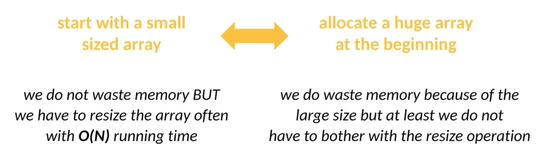

2) Добавление чисел в случайные позиции (О(N) линейный алгоритм, так как элементы должны быть передвинуты, в худшем случае все). Не предпочтительна.
3) Убрать последний элемент - быстрая и лёгкая операция - O(1) running time.
4) Убрать элемент из случайной позиции. Сначала надо найти элемент за время О(N), потом убрать элемент за О(1) и, наконец, передвинуть другие элементы за О(N).

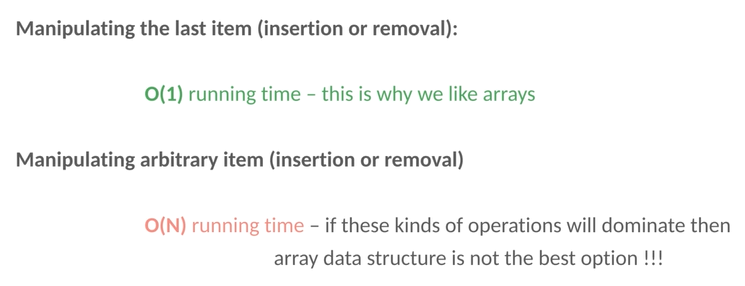

Плюсы:
1) Лучшая особенность массивов - случайный доступ (можно очень быстро получать доступ к произвольным позициям с помощью индексов);
2) Простая в понимании и использовании;
3) В целом быстрая структура данных;
4) Использовать, когда надо произвести дейсвия с последним элементом структуры данных или нужен доступ к элементам с известным доступом.

Минусы:
1) Это не динамичная структура, так как надо знать число хранимых элементов на время компиляции;
2) Когда вся структура будет заполнена, необходимо будет изменять размер за время O(N);
3) Обычно мы не можем хранить разные типы данных в массиве, но Питон исключение.

append() - добавление элемента в конец списка, O(1) operation.
list.extend(list2) - добавление списка_2 в конец списка_1

#### list-built-in functions:
- result = list.copy() - скопировать список;
- list.remove(item) - remove selected item;
- list.pop() - O(1) operation - return the last item we inserted;
- list.reverse() - reverse order of items;
- list.sort() - сортировка по алфавиту, по возрастанию чисел.

#### List comprehension. Списковое включение. (for one-dimensional array lists) 
Позволяет создать новый список на основе сущесвующих значений другого списка.

Вместо:
    'for num in numbers:
         if num % 2 == 0:
             new_list.append(num)'

Можно сделать: 'new_list = [num for num in numbers if num % 2 == 0]'

### Python basis

Типы данных. Переменные - контейнеры для хранение данных, резервируют места в памяти, чтобы хранить значения Создаётся в момент назначения значения. В других языках сначала нужно её объявить тип переменной (С или Джава);
5 типов данных: число, строка (one-dimensional arrays (одномерные массивы), начинаются с 0), {списки, кортежи (tuple, неизменяемые списки), словари} - {могут хранить данные эффективно}
bool values - двоичные значения.

Строки: диапазон индексов (создание substring) - список[первый индекс:последний индекс:размер шага], последний не входит.
String slicing (разделение строк), оператор ':'. Если первый индекс оставить пустым, он будет воспринят как нулевой. Если не указывать послений, то будет взят последний индекс строки.

Можно определить размер шага. Например шаг 2, значит, что через один индекс. То есть берётся каждое 2 число или каждое третье, если шаг 3 и так далее. Если положительный шаг, то слева направо. Если шаг сделать негативным значением, то справа налево и строка обратная.

Type casting - Приведение типов  (иногда нужно конкретизировать тип переменной). Питон - объектно-ориентированный язык, поэтому он определяет типы данных с помощью классов.

#### Tuples.
Похожи на списки, но неизменны (immutable).
tuple - ().
my_tuple = ('1', '2')

Если создать кортеж с 1 элементом, то он не будет считаться кортежем и тип класса будет другой.
Тогда нужна запись - my_tuple = ('1', )

#### Mutable and Immutable objects.
Mutable - позволяют модификацию после создания (списки, sets(наборы(?)), словари, кастомные объекты).
Immutable - не позволяют (int, float, boolean, tuple).

Расположение памяти у изменяемых объектов не меняется с изменением значений. Это не так с неизменяемыми объектами.

#### Linked List. Связный список.

Массивы имеют большой недостаток, что когда в структуре данных появляются "дыры", чтобы их убрать нужно передвинуть большое кол-во элементов.

- Состоит из узлов, которые имеют данные и ссылку на следующий узел; 
- Им нужно больше памяти, чем спискам;
- Преимущество - нету "дыр" в структуре данных, которые надо заполнять;
- Элементы не хранятся рядом друг с другом в памяти, так что нету рандомного индексирования;
- Можно реализовывать более сложные структуры данных, такие как стеки и очереди.
- Поиск случайного элемента всё ещё имеет O(N) скорость выполнения.

Огромное преимущество, то можно вставлять/убирать элементы в/из структуры данных со скоростью O(1).

Плюсы:
- Динамичная структура данных (могут приобретать память во время выполнения с помощью внедрения новых узлов);
- Не нужно изменять структуру данных, как в массивах;
- Не проблема, если мы не знаем сколько данных будем хранить;
- Манипуляции с первым элементов O(1) - running time;
- Можно хранить элементы разной размерности. В массивах предпологается, что элементы одного размера.

Минусы:
- Нужно больше памяти из-за ссылок;
- Нету random access - мы имеем доступ только к первому узлу (головному) в связном списке;
- Не может идти в обратную сторону - как получить предыдущий узел?;
- Не решило проблему с тем, как искать случайные элементы в списке быстрее, чем O(N).

#### Doubly Linked Lists.
У нас есть доступ к первому и последнему узлам (head and tail node).
Каждый узел имеет ссылку на правого и левого соседа.

##### import collections. Хранит несколько встроенных структур данных.
deque (двусторонняя очередь). Двусвязный список реализации связанных списков.

linked_list = collections.deque([])
linked_list.appendleft() - вставление элемента в начало списка.

pop() - returns and removes the right-most item
popleft() - return the left-most item

#### Dictionsries and Hashing.
Словари - абстрактный тип данных и структура основных данных это одномерный массив.
Состоит из коллекции key-value пар. Каждый ключ появляется только один раз в коллекции.
Скорость выполнения O(1) для большинства операций (добавление/удаление).

Функция хэширования (hash-function) позволяет преобразовать ключи в индексы массива в базовой структуре данных массива. Например, через ASCII-value.

dict.key(), dict.values(), dict.items() - список кортежей с ключ-значение. 
'for key, value in dict.items():
    print(key+' '+str(value))'

'for key, value in zip(my_dict.keys(), my_dict.values()):
    print(key+' '+str(value))'

Оба цикла выведут ключ+значение.

my_dict = dict(name='Kevin', gender='male', age=35)
В словарях значения так же могут быть словарями.
my_dict['name']['last_name'] - ссылка на ключ во вложенном словаре.

#### Sets.
Используют одномерный массив с хэш-функцией. Похожи на словари или хэш-таблицу.
Основное разлицие - сеты неупорядоченны и без индексов, то есть мы не знаем позиции элементов.
Также мы не можем хранить дупликаты. Python will remove duplicates in set.

my_set = {'name', 34, 3.5, True}
my_set = set(('Kevin', 34))

O(1) - constant running time.

set.add() - add new item.
set.update(['new_item', 55]) - append multiple items.

remove() - raise an error if item not in the set.
discard() - don't raise an error if item not in the set.

set1.union(set2) - join two sets.

#### Sorting.
sorted() - returns sorted list. 
sorted(nums, reverse=True) - убывающий порядок.
'key' parameter defines logic behind sorting.

def sorted_logic(x):
    return len(x)

sorted(nums, key=sorted_logic) - сортировка по длине.